In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import cv2

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/ML Handwriting Recognition/emnist-letters-train.csv")
df1.head()


,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2 =  pd.read_csv("/content/drive/MyDrive/ML Handwriting Recognition/emnist-letters-test.csv")
df2.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533,0.534,0.535,0.536,0.537,0.538,0.539,0.540,0.541,0.542,0.543,0.544,0.545,0.546,0.547,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,31,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df1.count())
print(df2.count())


23       88799
0        88799
0.1      88799
0.2      88799
0.3      88799
         ...  
0.411    88799
0.412    88799
0.413    88799
0.414    88799
0.415    88799
Length: 785, dtype: int64
1        14799
0        14799
0.1      14799
0.2      14799
0.3      14799
         ...  
0.553    14799
0.554    14799
0.555    14799
0.556    14799
0.557    14799
Length: 785, dtype: int64


In [ ]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88799 entries, 0 to 88798
Columns: 785 entries, 23 to 0.415
dtypes: int64(785)
memory usage: 531.8 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14799 entries, 0 to 14798
Columns: 785 entries, 1 to 0.557
dtypes: int64(785)
memory usage: 88.6 MB
None


In [ ]:
print(df1.describe())
print(df2.describe())


                 23        0      0.1  ...    0.413    0.414    0.415
count  88799.000000  88799.0  88799.0  ...  88799.0  88799.0  88799.0
mean      13.519161      0.0      0.0  ...      0.0      0.0      0.0
std        7.502906      0.0      0.0  ...      0.0      0.0      0.0
min        1.000000      0.0      0.0  ...      0.0      0.0      0.0
25%        7.000000      0.0      0.0  ...      0.0      0.0      0.0
50%       14.000000      0.0      0.0  ...      0.0      0.0      0.0
75%       20.000000      0.0      0.0  ...      0.0      0.0      0.0
max       26.000000      0.0      0.0  ...      0.0      0.0      0.0

[8 rows x 785 columns]
                  1        0      0.1  ...    0.555    0.556    0.557
count  14799.000000  14799.0  14799.0  ...  14799.0  14799.0  14799.0
mean       9.757348      0.0      0.0  ...      0.0      0.0      0.0
std        5.344262      0.0      0.0  ...      0.0      0.0      0.0
min        1.000000      0.0      0.0  ...      0.0      0.0      

In [ ]:
print(df1.isnull().sum())
print(df2.isnull().sum())


23       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.411    0
0.412    0
0.413    0
0.414    0
0.415    0
Length: 785, dtype: int64
1        0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.553    0
0.554    0
0.555    0
0.556    0
0.557    0
Length: 785, dtype: int64


In [ ]:
df1 = df1.rename(columns={df1.columns[0]: 'Alp_label'})
df2 = df2.rename(columns={df2.columns[0]: 'Alp_label'})

print(df1.head())
print(df2.head())

for i in range(1,27):
 df1['Alp_label'] = df1['Alp_label'].replace([i],i-1)

for i in range(1,27):
 df2['Alp_label'] = df2['Alp_label'].replace([i],i-1)
 
#df1['Alp_label'] = df1['Alp_label'].replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])


   Alp_label  0  0.1  0.2  0.3  0.4  ...  0.410  0.411  0.412  0.413  0.414  0.415
0          7  0    0    0    0    0  ...      0      0      0      0      0      0
1         16  0    0    0    0    0  ...      0      0      0      0      0      0
2         15  0    0    0    0    0  ...      0      0      0      0      0      0
3         23  0    0    0    0    0  ...      0      0      0      0      0      0
4         17  0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]
   Alp_label  0  0.1  0.2  0.3  0.4  ...  0.552  0.553  0.554  0.555  0.556  0.557
0          1  0    0    0    0    0  ...      0      0      0      0      0      0
1          1  0    0    0    0    0  ...      0      0      0      0      0      0
2          1  0    0    0    0    0  ...      0      0      0      0      0      0
3          1  0    0    0    0    0  ...      0      0      0      0      0      0
4          1  0    0    0    0    0  ...      0      0      0  

In [ ]:
print(df1.head())
print(df2.head())

   Alp_label  0  0.1  0.2  0.3  0.4  ...  0.410  0.411  0.412  0.413  0.414  0.415
0          6  0    0    0    0    0  ...      0      0      0      0      0      0
1         15  0    0    0    0    0  ...      0      0      0      0      0      0
2         14  0    0    0    0    0  ...      0      0      0      0      0      0
3         22  0    0    0    0    0  ...      0      0      0      0      0      0
4         16  0    0    0    0    0  ...      0      0      0      0      0      0

[5 rows x 785 columns]
   Alp_label  0  0.1  0.2  0.3  0.4  ...  0.552  0.553  0.554  0.555  0.556  0.557
0          0  0    0    0    0    0  ...      0      0      0      0      0      0
1          0  0    0    0    0    0  ...      0      0      0      0      0      0
2          0  0    0    0    0    0  ...      0      0      0      0      0      0
3          0  0    0    0    0    0  ...      0      0      0      0      0      0
4          0  0    0    0    0    0  ...      0      0      0  

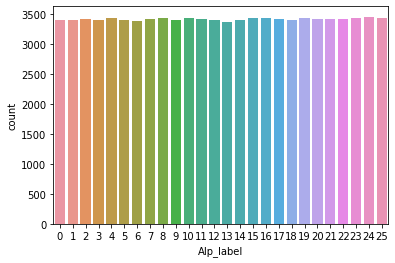

In [ ]:
sns.countplot(x='Alp_label', data=df1)

In [ ]:
x1 = df1.drop(['Alp_label'],axis=1)
y1 = df1['Alp_label']

x2 = df2.drop(['Alp_label'],axis=1)
y2 = df2['Alp_label']

print(x1.shape)
print(y1.shape)
print(x2.shape)
print(y2.shape)


(88799, 784)
(88799,)
(14799, 784)
(14799,)


F
N
L
I
D


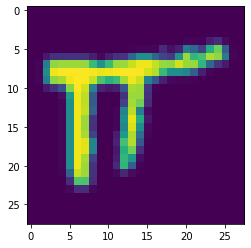

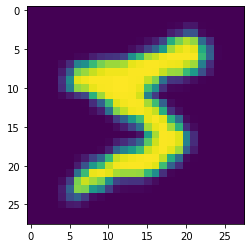

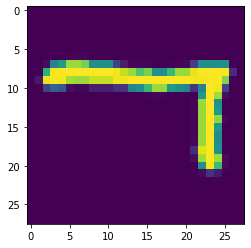

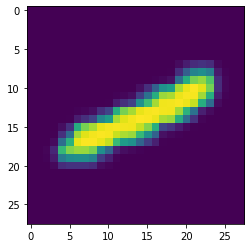

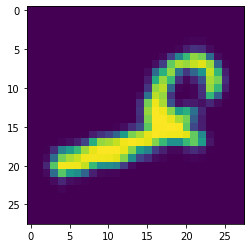

In [ ]:
import random
#preview of images
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
for i in range(0,5):
  fig = plt.figure()
  idx = random.randint(0,88799)
  img = x1.loc[idx].values.reshape(28,28)
  print(chr(y1[idx]+65))
  plt.imshow(img)


# **MODEL BUILDING BASIC CLASSIFIER**

In [ ]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x1,y1,test_size=0.3,random_state=42)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

print(xTrain.shape)
print(xTest.shape)

(62159, 784)
(26640, 784)


**GaussianNB - NAIVE BAYES CLASSIFIER**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

GaussianNB_model = GaussianNB().fit(xTrain,yTrain)
yPred_gnb = GaussianNB_model.predict(xTest)
accuracy_gnb = accuracy_score(yTest,yPred_gnb)
print("The accuracy score for GaussianNB is: ",accuracy_gnb)



MultinomialNB_model = MultinomialNB().fit(xTrain,yTrain)
yPred_mnb = MultinomialNB_model.predict(xTest)
accuracy_mnb = accuracy_score(yTest,yPred_mnb)
print("The accuracy score for MultinomialNB is: ",accuracy_mnb)

The accuracy score for GaussianNB is:  0.3489864864864865
The accuracy score for MultinomialNB is:  0.5706456456456457


**DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier_model = DecisionTreeClassifier(random_state = 42).fit(xTrain,yTrain)
yPred_dtc = DecisionTreeClassifier_model.predict(xTest)
accuracy_dtc = accuracy_score(yTest,yPred_dtc)
print("The accuracy score of Decision Tree is: ",accuracy_dtc)


The accuracy score of Decision Tree is:  0.6656156156156157


**PREPROCESSING AND CNN**

In [ ]:
import tensorflow as tf


x1 = x1.astype("float32")
x2 = x2.astype("float32")

#rescale the pixel values in range 0 - 1 
x1 = x1/255.0
x2 = x2/255.0

x1 = x1.values.reshape(x1.shape[0],28,28,1)
x2 = x2.values.reshape(x2.shape[0],28,28,1)

print(x1.shape)
print(x2.shape)

(88799, 28, 28, 1)
(14799, 28, 28, 1)


In [ ]:
from keras.utils import to_categorical
y1_one_hot = to_categorical(y1,dtype ="int64")
y2_one_hot = to_categorical(y2,dtype ="int64")

print(np.unique(y1))
print("original:", y1[1])
print("one hot encoding",y1_one_hot[1])

print(np.unique(y2))
print("original:", y2[1])
print("one hot encoding",y2_one_hot[1])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
original: 15
one hot encoding [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
original: 0
one hot encoding [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(x1, y1_one_hot, test_size=0.2, random_state=13)

In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import ReLU

In [ ]:
batch_size = 64
epoch = 20
num_classes = 26

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,kernel_size= (3,3),activation='relu',input_shape = (28,28,1),padding='same'))
#cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D((2,2),padding='same'))

cnn_model.add(Conv2D(64,kernel_size= (3,3),activation='relu',padding='same'))
#cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D((2,2),padding='same'))

cnn_model.add(Conv2D(128,kernel_size= (3,3),activation='relu',padding='same'))
#cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D((2,2),padding='same'))

cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation='relu'))
#cnn_model.add(Activation('relu'))
cnn_model.add(Dense(num_classes,activation='softmax'))

In [ ]:
cnn_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [ ]:
cnn_training = cnn_model.fit(train_X,train_Y,batch_size=batch_size,epochs=20,verbose=1,validation_data=(test_X,test_Y))

Epoch 1/20
1110/1110 [==============================] - 38s 5ms/step - loss: 0.9676 - accuracy: 0.7102 - val_loss: 0.2745 - val_accuracy: 0.9072
Epoch 2/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.2371 - accuracy: 0.9182 - val_loss: 0.2378 - val_accuracy: 0.9236
Epoch 3/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.1864 - accuracy: 0.9359 - val_loss: 0.2187 - val_accuracy: 0.9292
Epoch 4/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.1587 - accuracy: 0.9438 - val_loss: 0.1942 - val_accuracy: 0.9371
Epoch 5/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.1360 - accuracy: 0.9508 - val_loss: 0.2007 - val_accuracy: 0.9358
Epoch 6/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.1177 - accuracy: 0.9563 - val_loss: 0.2034 - val_accuracy: 0.9347
Epoch 7/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.1030 - accuracy: 0.9606 - val_loss: 0.2179 - val_accuracy

In [ ]:
cnn_eval = cnn_model.predict(x2)
print(cnn_eval)
arr= []
for eval in cnn_eval:
  arr.append(eval.argmax(axis=0))

print(arr)


[[1.0000000e+00 7.9780376e-19 6.0420753e-31 ... 3.0227440e-26
  2.0262621e-21 9.4967091e-24]
 [9.9999917e-01 7.6970643e-12 7.8668876e-09 ... 1.8647200e-15
  4.3119067e-13 2.9559370e-15]
 [9.9720144e-01 2.9828531e-10 4.6003623e-09 ... 2.4162894e-17
  2.8250054e-12 2.7816044e-13]
 ...
 [1.9066250e-18 3.2212527e-13 1.0597546e-14 ... 4.3373190e-19
  1.3258609e-16 4.5014914e-17]
 [2.8668495e-25 1.6904462e-14 1.2683259e-22 ... 2.4555539e-25
  5.5069191e-22 8.2175643e-22]
 [2.4295664e-18 4.1509019e-13 3.9908707e-13 ... 6.0701518e-21
  4.5284562e-20 1.4442291e-17]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 25, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(y2)

0         0
1         0
2         0
3         0
4         0
         ..
14794    18
14795    18
14796    18
14797    18
14798    18
Name: Alp_label, Length: 14799, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score
acu = accuracy_score(arr,y2)
print(acu)


0.9174268531657545


**PLOt**

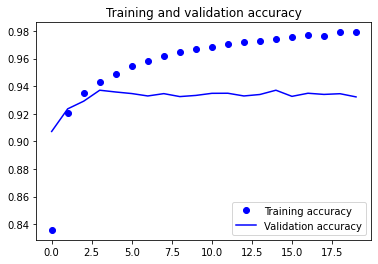

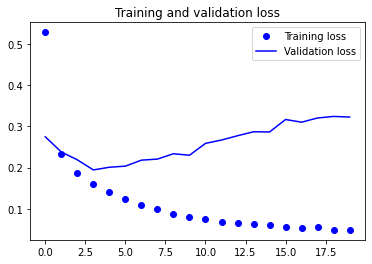

In [ ]:
accuracy = cnn_training.history['accuracy']
val_accuracy = cnn_training.history['val_accuracy']
loss = cnn_training.history['loss']
val_loss = cnn_training.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


**ADDING DROPOUT TO THE NETWORK**

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,kernel_size= (3,3),activation='relu',input_shape = (28,28,1),padding='same'))
cnn_model.add(MaxPooling2D((2,2),padding='same'))
cnn_model.add(Dropout(0.25))


cnn_model.add(Conv2D(64,kernel_size= (3,3),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D((2,2),padding='same'))
cnn_model.add(Dropout(0.25))


cnn_model.add(Conv2D(128,kernel_size= (3,3),activation='relu',padding='same'))
cnn_model.add(MaxPooling2D((2,2),padding='same'))
cnn_model.add(Dropout(0.3))


cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(num_classes,activation='softmax'))

In [ ]:
cnn_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
cnn_model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f7c06f59410>>

In [ ]:
cnn_training = cnn_model.fit(train_X,train_Y,batch_size=batch_size,epochs=20,verbose=1,validation_data=(test_X,test_Y))

Epoch 1/20
1110/1110 [==============================] - 6s 5ms/step - loss: 1.4036 - accuracy: 0.5746 - val_loss: 0.3013 - val_accuracy: 0.9026
Epoch 2/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.4168 - accuracy: 0.8630 - val_loss: 0.2365 - val_accuracy: 0.9212
Epoch 3/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.3329 - accuracy: 0.8900 - val_loss: 0.2136 - val_accuracy: 0.9282
Epoch 4/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.3001 - accuracy: 0.9023 - val_loss: 0.2062 - val_accuracy: 0.9312
Epoch 5/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.2661 - accuracy: 0.9096 - val_loss: 0.1933 - val_accuracy: 0.9352
Epoch 6/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.2558 - accuracy: 0.9145 - val_loss: 0.1806 - val_accuracy: 0.9382
Epoch 7/20
1110/1110 [==============================] - 5s 5ms/step - loss: 0.2387 - accuracy: 0.9190 - val_loss: 0.1761 - val_accuracy:

In [ ]:
cnn_eval = cnn_model.predict(x2)
print(cnn_eval)
arr= []
for eval in cnn_eval:
  arr.append(eval.argmax(axis=0))

print(arr)


[[9.99998927e-01 5.06129860e-11 2.58735292e-18 ... 1.47625256e-14
  1.94989881e-14 6.69334170e-17]
 [9.96667206e-01 1.74534893e-08 2.23438801e-05 ... 3.39686657e-09
  1.45828824e-06 2.20073090e-07]
 [9.75324392e-01 2.23405891e-07 2.35957009e-06 ... 2.41949092e-08
  8.59077943e-07 1.62308808e-07]
 ...
 [1.13620936e-11 1.72138257e-07 4.37389430e-10 ... 3.43142470e-15
  4.57129057e-10 3.71892905e-10]
 [3.71823641e-16 4.94402574e-10 1.72517209e-11 ... 3.89156615e-17
  2.53235627e-11 2.80908482e-14]
 [8.76372397e-09 4.98318695e-05 1.45548063e-06 ... 1.76215365e-09
  3.54071943e-07 2.02764653e-07]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
print(y2)

0         0
1         0
2         0
3         0
4         0
         ..
14794    18
14795    18
14796    18
14797    18
14798    18
Name: Alp_label, Length: 14799, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score
acu = accuracy_score(arr,y2)
print(acu)


0.9339144536793027


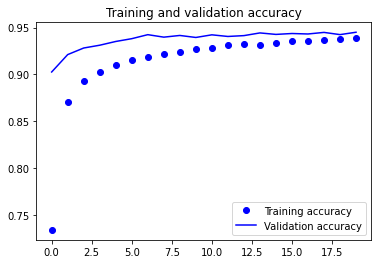

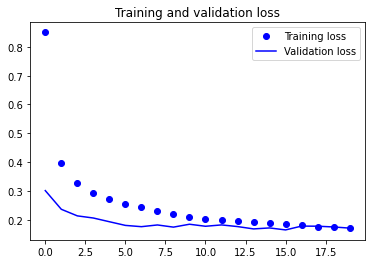

In [ ]:
accuracy = cnn_training.history['accuracy']
val_accuracy = cnn_training.history['val_accuracy']
loss = cnn_training.history['loss']
val_loss = cnn_training.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


**Converting image to 28X28 pixel**

In [ ]:
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

In [ ]:
def imageprepare(argv):
   im = Image.open(argv).convert('L')
   width = float(im.size[0])
   height = float(im.size[1])
   newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels
   if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 28 pixels.
        nheight = int(round((26.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((26, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
   else:
        # Height is bigger. Heigth becomes 28 pixels.
        nwidth = int(round((28.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 26), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical position
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas
   
    # newImage.save("sample.png
   tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
   tva = [((255.0-x)/ 255.0) for x in tv]
   print(tva)
   return tva


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011764705882352941, 0.0, 0.0, 0.0, 0.00392156862745098, 0.0, 0.0, 0.00784313725490196, 0.00392156862745098, 0.01568627450980392, 0.00392156862745098, 0.00392156862745098, 0.0, 0.0, 0.01568627450980392, 0.00392156862745098, 0.0, 0.00392156862745098, 0.01568627450980392, 0.0, 0.011764705882352941, 0.0, 0.0, 0.0, 0.0, 0.00784313725490196, 0.00392156862745098, 0.011764705882352941, 0.0, 0.0, 0.00392156862745098, 0.01176470

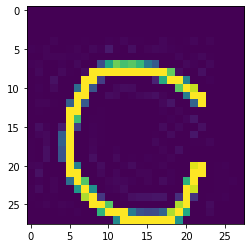

In [ ]:
x=[imageprepare('/content/drive/MyDrive/ML Handwriting Recognition/images/image_1.jpg')]#file path here
print(len(x))# mnist IMAGES are 28x28=784 pixels
print(len(x[0]))
#Now we convert 784 sized 1d array to 28x28 sized 2d array so that we can visualize it
newArr=[[0 for d in range(28)] for y in range(28)]
k = 0
for i in range(28):
    for j in range(28):
        newArr[i][j]=x[0][k]
        k=k+1

plt.imshow(newArr, interpolation='nearest')
plt.show()#Show / plot that image


In [ ]:
newArr = np.array(newArr)
print(newArr.shape)
newArr = newArr.reshape(-1,28,28,1)
print(newArr.shape)

cnn_eval_x = cnn_model.predict(newArr)
print(cnn_eval_x)

arr_x= []
for eval in cnn_eval_x:
  arr_x.append(eval.argmax(axis=0))

print(arr_x[0])
print("Prediction",chr(arr_x[0]+65))



(28, 28)
(1, 28, 28, 1)
[[6.9524981e-02 8.5637312e-06 8.9150137e-01 1.5015066e-04 5.0271855e-04
  2.0258367e-06 2.6195106e-04 5.8103087e-06 4.8726848e-05 1.6678539e-05
  1.3384996e-06 7.7596151e-06 7.1337712e-07 5.5497345e-03 2.9813235e-03
  2.3096223e-05 2.4925603e-02 4.3008202e-03 1.7698502e-04 1.3021004e-06
  2.9151443e-06 4.1648777e-06 8.6225748e-07 5.9011825e-08 3.3401304e-07
  3.9306375e-08]]
2
Prediction C


In [ ]:
import numpy as np
import argparse
import imutils
import cv2
def sort_contours(cnts, method="left-to-right"):
	# initialize the reverse flag and sort index
	reverse = False
	i = 0
	# handle if we need to sort in reverse
	if method == "right-to-left" or method == "bottom-to-top":
		reverse = True
	# handle if we are sorting against the y-coordinate rather than
	# the x-coordinate of the bounding box
	if method == "top-to-bottom" or method == "bottom-to-top":
		i = 1
	# construct the list of bounding boxes and sort them from top to
	# bottom
	boundingBoxes = [cv2.boundingRect(c) for c in cnts]
	(cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
		key=lambda b:b[1][i], reverse=reverse))
	# return the list of sorted contours and bounding boxes
	return (cnts, boundingBoxes)

In [ ]:
# import the necessary packages
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import numpy as np
import argparse
import imutils
import cv2


# load the input image from disk, convert it to grayscale, and blur
# it to reduce noise
image = cv2.imread('/content/drive/MyDrive/ML Handwriting Recognition/images/uni.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []

In [ ]:
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)
	# filter out bounding boxes, ensuring they are neither too small
	# nor too large
	if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
		# extract the character and threshold it to make the character
		# appear as *white* (foreground) on a *black* background, then
		# grab the width and height of the thresholded image
		roi = gray[y:y + h, x:x + w]
		thresh = cv2.threshold(roi, 0, 255,
			cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
		(tH, tW) = thresh.shape
		# if the width is greater than the height, resize along the
		# width dimension
		if tW > tH:
			thresh = imutils.resize(thresh, width=32)
		# otherwise, resize along the height
		else:
			thresh = imutils.resize(thresh, height=32)
   
   # re-grab the image dimensions (now that its been resized)
		# and then determine how much we need to pad the width and
		# height such that our image will be 32x32
		(tH, tW) = thresh.shape
		dX = int(max(0, 28 - tW) / 2.0)
		dY = int(max(0, 28 - tH) / 2.0)
		# pad the image and force 32x32 dimensions
		padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
		padded = cv2.resize(padded, (28, 28))
		# prepare the padded image for classification via our
		# handwriting OCR model
		padded = padded.astype("float32") / 255.0
		padded = np.expand_dims(padded, axis=-1)
		# update our list of characters that will be OCR'd
		chars.append((padded, (x, y, w, h)))

In [ ]:
# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")
# OCR the characters using our handwriting recognition model
print(chars.shape)
preds = cnn_model.predict(chars)
# define the list of label names
labelNames = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]